# MCO1: Technical Report

DATAPRE S14

- Aldecoa, Renzel Raphael
- Bautista, Carlo Gabriel
- Canicon, Jan Ambro
- Lim, Christopher

# Important notes
- Some of the cells are changed from code cells to "raw" cell ([source](https://stackoverflow.com/questions/34192290/ipython-notebook-elegant-way-of-turning-off-part-of-cells)) in order to stop them from running. These were "frozen" from running as they would be performing web scraping and data cleaning—causing long run times and errors for the preprocessing cells (since they would be reading from already-preprocessed data).
- If running every code cell from the start, please convert the corresponding cell to a code cell before running all cells. These are marked with "RUN ONCE" as a header comment.
- An alternative is to run only the **Library Imports** and then "Run All Below" from **Exploratory Data Analysis**.

# CS:GO Players Ranked Statistics
*Counter-Strike: Global Offensive* is a first-person tactical shooter with a ranked competitive game mode. Players would matchmake for a 5-versus-5 lobby with players of the same or similar skill level in order to try improving their ranks. The ranks are divided into:
- The lower tier; Silver 1 through 4, Silver Elite, & Silver Elite Master
- The middle tier; Gold Nova 1 through 4
- The upper tier; Master Guardian 1 & 2, Master Guardian Elite, & Distinguished Master Guardian
- The top tier; Legendary Eagle, Legendary Egle Master, Supreme Master First Class, & The Global Elite


One of the major "concerns" by the playerbase is that **if player statistics matter when determining their rank**. This notebook serves to answer the following questions:
1. What are the average stats (K/D, 1vX, Rating, etc.) of players in each rank?
2. Do higher ranking players tend to perform better than lower ranked ones?
3. How much do player stats predict rankings?

## Library Imports

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import time
import random
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from scipy import stats
from sklearn import preprocessing

# Data Scraping

## Set constant variables

In [2]:
base_url = 'https://csgostats.gg/'
leaderboards_url = 'https://csgostats.gg/leaderboards'

## Get list of ranks and the urls for each rank leaderboard.

### Using Requests (can't scrape due to captcha)

### Using selenium (success)

## Get all the players and their stats for each rank

### Scraping Timeframe: 
1. 06/16/22 5PM to 06/16/22 8PM. 
2. 06/17/2022 7:30AM to 06/17/2022 8:30AM.

## Combining all the files
From the scraping, we seperated the files since some failures occur, so we save the progress to a json file. Now we have to combine all the files so get all the players.

### Remove duplicate values
To get the duplicated values, we create a new column named `Unique` which contains the `Competitive Rank` and `Leaderboards Rank`. This works since `Leaderboards Rank` should only occur once in each `Competitive Rank`

As can be seen, the original values were 517738, and when we get the unique values it became 481792. This shows that there are duplicated values.

Remove Duplicates

# Data Preprocessing
To see which features need to be preprocessed, we print the a segment of the dataset.

### Convert `HS %` into Integer
Since `HS %` in the website are presented as whole numbers, we convert the column to an `int` data type.

### Convert `Win Rate` into Integer
`Win Rate` in the website is also presented as whole numbers, so we convert the column to an `int` data type.

## Create column for `Kills` and `Deaths`
The website stored the details of `K/D Ratio` (`Kills`, `Deaths`) into one column, so we derive each from it into separate columns as features.

## Replace Nulls and blank values for Weapons with `None`

## Merge "Knife" category weapons

Knives in CSGO are a purely cosmetic change with no performance difference, so all weapons that can be classified as a knife is changed to `knife`.

## Save preprocessed data to JSON file

# Exploratory Data Analysis

The EDA will be reading the data from the scraped and preprocessed data saved into a JSON file.

In [3]:
df = pd.read_json('./data/players.json')
df.head()

Competitive Rank  Leaderboards Rank                      Username  \
0         Silver I                  1                      Chosen 1   
1         Silver I                  2  David Hasslehof's Hairy Nuts   
2         Silver I                  3                          樱岛麻衣   
3         Silver I                  4                  AdolfPootler   
4         Silver I                  5                     The Honse   

  Primary Weapon Secondary Weapon  K/D Score  HS %  Win Rate  1vX  Rating  \
0  m4a1_silencer             ak47       6.72    33        90   12    2.75   
1          ssg08             ak47       2.15    65        80   11    2.10   
2           ak47           deagle       2.36    59        10    2    1.99   
3           ak47           deagle       1.73    52        50   11    1.98   
4           ak47         revolver       1.92    52        60    7    1.97   

   Kills  Deaths  
0    195      29  
1    277     129  
2    227      96  
3    228     132  
4    265     138

*Reviewing shape of scraped data*: With `df.shape`, we can see that our dataset has 481,792 rows and 12 columns. These numbers correspond to the 481,792 player data retrieved from CSGOStats.gg and the 12 features that contain information for each player.

In [4]:
df.shape

(481792, 12)

*Viewing the different data types of each column of data*: Using `df.info()`, it can be seen that most of the stats recorded in the website are made up of numbers (floats and integers), with a few strings for `Competitive Rank`, `Username`, and their most used weapons in-game.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481792 entries, 0 to 481791
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Competitive Rank   481792 non-null  object 
 1   Leaderboards Rank  481792 non-null  int64  
 2   Username           481792 non-null  object 
 3   Primary Weapon     481792 non-null  object 
 4   Secondary Weapon   481792 non-null  object 
 5   K/D Score          481792 non-null  float64
 6   HS %               481792 non-null  int64  
 7   Win Rate           481792 non-null  int64  
 8   1vX                481792 non-null  int64  
 9   Rating             481792 non-null  float64
 10  Kills              481792 non-null  int64  
 11  Deaths             481792 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 44.1+ MB


*Descriptive statistics of the scraped data*: Using `df.info()`, we can compute the mean, standarad deviation, minimum and maximum values, and so on. This will be helpful in spotting averages from across our dataset as well as spot unusual behaviors or values in the numbers computed.

In [6]:
df.describe()

Leaderboards Rank      K/D Score           HS %       Win Rate  \
count      481792.000000  481792.000000  481792.000000  481792.000000   
mean        18757.933714       1.013394      38.183341      45.649035   
std         13614.756154       0.310852       9.064786      17.407108   
min             0.000000       0.000000       0.000000       0.000000   
25%          7507.000000       0.830000      32.000000      30.000000   
50%         15952.000000       0.980000      38.000000      50.000000   
75%         27955.000000       1.160000      44.000000      60.000000   
max         54675.000000      28.330000      93.000000     100.000000   

                 1vX         Rating          Kills         Deaths  
count  481792.000000  481792.000000  481792.000000  481792.000000  
mean        4.572322       1.000669     165.000745     165.769135  
std         2.805125       0.244459      46.199131      32.142983  
min         0.000000       0.000000       0.000000       0.000000  
25%         3.000000       0.840000     135.000000     152.000000  
50%         4.000000       0.980000     166.000000     173.000000  
75%         6.000000       1.140000     195.000000     188.000000  
max        30.000000       4.990000     485.000000     254.000000

Looking at the statistics generated, we can notice unusual 0 values in every column. Let's explore each column and explain these anomalies.

First is the `Leaderboards Rank`. This is assigned to players in the leaderboard after having been given a *Rating* (will be discuss later). Each division (Silver I, Silver II, etc.) has their own leaderboards.

In [7]:
df[['Username', 'Competitive Rank', 'Leaderboards Rank']].head()

Username Competitive Rank  Leaderboards Rank
0                      Chosen 1         Silver I                  1
1  David Hasslehof's Hairy Nuts         Silver I                  2
2                          樱岛麻衣         Silver I                  3
3                  AdolfPootler         Silver I                  4
4                     The Honse         Silver I                  5

In [8]:
df.loc[df['Competitive Rank'] == 'Silver II'].head()

Competitive Rank  Leaderboards Rank                          Username  \
1861        Silver II                  1                          把你女马撕碎生吃   
1862        Silver II                  2  MANCH! DAAAAAAAAAAAAAAAAAAAAAAAA   
1863        Silver II                  3                       LordSherman   
1864        Silver II                  4                            cedr1p   
1865        Silver II                  5                   I'm Just Better   

     Primary Weapon Secondary Weapon  K/D Score  HS %  Win Rate  1vX  Rating  \
1861            awp             ak47       2.70    40        50    8    2.12   
1862           ak47    m4a1_silencer       3.10    48        80   19    2.10   
1863           ak47              awp       2.28    41        50    8    2.06   
1864           m4a1             ak47       2.32    48        60    5    2.04   
1865           ak47              awp       2.64    35        80   10    2.04   

      Kills  Deaths  
1861    273     101  
1862    319     103  
1863    157      69  
1864    265     114  
1865    322     122

The `Leaderboards Rank` should only be greater than or equal to 1 (1 being the top ranking player in that division's leaderboard). Descriptive statistics show that there is an entry with a 0 LR.

In [9]:
df.loc[df['Leaderboards Rank'] == 0]

Competitive Rank  Leaderboards Rank Username Primary Weapon  \
154988  Gold Nova Master                  0     Dash           ak47   

       Secondary Weapon  K/D Score  HS %  Win Rate  1vX  Rating  Kills  Deaths  
154988    m4a1_silencer       1.09    49        50    3    1.08    163     149

This occurance was observed, and has worsened, after initially scraping the website. In visiting the website now, some rank divisions do not have *Leaderboard Ranks* asssigned to the players in their respective lists. Thankfully, this unknown error has not greatly affected the scraped data that we have.

Next, we explore the `K/D Score`, `Kills`, and `Deaths`. `Kills` pertain to enemy takedowns in-game and `Deaths` amounts to the number of times a player dies in a match. The `K/D Score` is computed by dividing the amount of kills per death (Kills / Deaths).

In [10]:
df[['Username', 'K/D Score', 'Kills', 'Deaths']].head()

Username  K/D Score  Kills  Deaths
0                      Chosen 1       6.72    195      29
1  David Hasslehof's Hairy Nuts       2.15    277     129
2                          樱岛麻衣       2.36    227      96
3                  AdolfPootler       1.73    228     132
4                     The Honse       1.92    265     138

Some players that made it into the leaderboards have a *K/D Score* of 0 or 0 in the *Kills* column. This implies that these players have not gotten in-game kills in their past 10 or more games, as per the minimum requirement of games played for appearing in the leaderboards.

In [11]:
df.loc[df['K/D Score'] == 0]

Competitive Rank  Leaderboards Rank              Username  \
1111            Silver I               1199  .#TrueGaming l Gotya   
1410            Silver I               1507                   wtf   
1623            Silver I               1731            好想被萝卜小姐超市啊   
1670            Silver I               1780              sayonara   
1672            Silver I               1782                   𝒄𝒂𝒍   
...                  ...                ...                   ...   
481787  The Global Elite              10053                 retro   
481788  The Global Elite              10054       K3Ty patinetY †   
481789  The Global Elite              10055                 qeety   
481790  The Global Elite              10056              Jungle G   
481791  The Global Elite              10057         ︻デ 一 ☭ sniper   

       Primary Weapon Secondary Weapon  K/D Score  HS %  Win Rate  1vX  \
1111             None             None        0.0     0         0    0   
1410             None             None        0.0     0        50    0   
1623             None             None        0.0     0        30    0   
1670             None             None        0.0     0        50    0   
1672             None             None        0.0     0        50    0   
...               ...              ...        ...   ...       ...  ...   
481787           None             None        0.0     0        40    0   
481788           None             None        0.0     0         0    0   
481789           None             None        0.0     0        40    0   
481790           None             None        0.0     0        40    0   
481791           None             None        0.0     0        40    0   

        Rating  Kills  Deaths  
1111      0.61      0      10  
1410      0.53      0      10  
1623      0.44      0      14  
1670      0.41      0      10  
1672      0.41      0      10  
...        ...    ...     ...  
481787    0.36      0      17  
481788    0.33      0      10  
481789    0.33      0      18  
481790    0.33      0      18  
481791    0.33      0      18  

[316 rows x 12 columns]

Conversely, the players with 0 in the `Deaths` column have not died in a match for their past 10 or more games.

In [12]:
df.loc[df['Deaths'] == 0]

Competitive Rank  Leaderboards Rank  \
41562                       Silver IV              13580   
102131                    Gold Nova I              24015   
102135                    Gold Nova I              24019   
154986                  Gold Nova III              32737   
186879               Gold Nova Master              36564   
218570              Master Guardian I              31714   
229161              Master Guardian I              42322   
278723             Master Guardian II              39277   
332348          Master Guardian Elite              42144   
341210          Master Guardian Elite              51794   
341211          Master Guardian Elite              51797   
377409  Distinguished Master Guardian              38032   
377544  Distinguished Master Guardian              38173   
377694  Distinguished Master Guardian              38328   
383815  Distinguished Master Guardian              44752   
416029                Legendary Eagle              33135   
416116                Legendary Eagle              33224   
416202                Legendary Eagle              33315   
416329                Legendary Eagle              33454   
449362     Supreme Master First Class               1124   
468930     Supreme Master First Class              23749   
469020     Supreme Master First Class              23854   
469097     Supreme Master First Class              23944   
481137               The Global Elite               9403   
481146               The Global Elite               9412   
481176               The Global Elite               9442   
481177               The Global Elite               9443   

                          Username Primary Weapon Secondary Weapon  K/D Score  \
41562                            鬼           None             None        0.0   
102131                           0           ak47            glock        6.0   
102135  like a pussy get wet nigga           None             None        0.0   
154986          5204 / 5204 / 5204            awp     usp_silencer        6.0   
186879     ( ° ͜ʖ͡°)Ɑ͞ ̶͞ ̶͞ ̶͞ ﻝﮞ           None             None        0.0   
218570                   COBRA KAI            p90             tec9        8.0   
229161                 -ZUHN-1337-           None             None        0.0   
278723                      Amogus          knife     usp_silencer        1.0   
332348                     CAMBULA           None             None        0.0   
341210                 ✪ pestko;^)           None             None        0.0   
341211                    eSQu ❤️M           None             None        0.0   
377409                        Moet          knife             None        0.0   
377544                      beavis           None             None        0.0   
377694               RumcajS Black           None             None        0.0   
383815       cursed [[[[[[[[[[[[[[           None             None        0.0   
416029                      eumen2           None             None        0.0   
416116                        Rose           None             None        0.0   
416202                       YESSA           None             None        0.0   
416329                      Monkey           None             None        0.0   
449362                     McLovin   usp_silencer            glock       21.0   
468930                      Xanthe           None             None        0.0   
469020                        古関ウイ          knife     usp_silencer        0.0   
469097                         6x6           None             None        0.0   
481137                        FFF3           None             None        0.0   
481146                      Canada           None             None        0.0   
481176             Rockschuppen💕🍕🦄          knife             None        0.0   
481177               Yodii g4skins           None             None        0.0   

        HS %  Win Rate  1vX  Rating  Kills  Deaths  
41562      0      

`HS %` is the percentage of kills that were made via headshot (shooting an enemy in the head). Having 0 in the `HS %` column would mean that the player has not had a kill that ended in a headshot.

In [13]:
df[['Username', 'HS %']].head()

Username  HS %
0                      Chosen 1    33
1  David Hasslehof's Hairy Nuts    65
2                          樱岛麻衣    59
3                  AdolfPootler    52
4                     The Honse    52

In [14]:
df.loc[df['HS %'] == 0]

Competitive Rank  Leaderboards Rank              Username  \
1111            Silver I               1199  .#TrueGaming l Gotya   
1410            Silver I               1507                   wtf   
1623            Silver I               1731            好想被萝卜小姐超市啊   
1670            Silver I               1780              sayonara   
1672            Silver I               1782                   𝒄𝒂𝒍   
...                  ...                ...                   ...   
481787  The Global Elite              10053                 retro   
481788  The Global Elite              10054       K3Ty patinetY †   
481789  The Global Elite              10055                 qeety   
481790  The Global Elite              10056              Jungle G   
481791  The Global Elite              10057         ︻デ 一 ☭ sniper   

       Primary Weapon Secondary Weapon  K/D Score  HS %  Win Rate  1vX  \
1111             None             None        0.0     0         0    0   
1410             None             None        0.0     0        50    0   
1623             None             None        0.0     0        30    0   
1670             None             None        0.0     0        50    0   
1672             None             None        0.0     0        50    0   
...               ...              ...        ...   ...       ...  ...   
481787           None             None        0.0     0        40    0   
481788           None             None        0.0     0         0    0   
481789           None             None        0.0     0        40    0   
481790           None             None        0.0     0        40    0   
481791           None             None        0.0     0        40    0   

        Rating  Kills  Deaths  
1111      0.61      0      10  
1410      0.53      0      10  
1623      0.44      0      14  
1670      0.41      0      10  
1672      0.41      0      10  
...        ...    ...     ...  
481787    0.36      0      17  
481788    0.33      0      10  
481789    0.33      0      18  
481790    0.33      0      18  
481791    0.33      0      18  

[332 rows x 12 columns]

`Win Rate` pertains to the win-to-loss ratio computed from the player's past 10 or more games. Having a `Win Rate` of 0 would mean that the player has not won matches for their past 10 or more games.

In [15]:
df[['Username', 'Win Rate']].head()

Username  Win Rate
0                      Chosen 1        90
1  David Hasslehof's Hairy Nuts        80
2                          樱岛麻衣        10
3                  AdolfPootler        50
4                     The Honse        60

In [16]:
df.loc[df['Win Rate'] == 0]

Competitive Rank  Leaderboards Rank             Username  \
5               Silver I                  6                 hdll   
8               Silver I                 10               sinned   
38              Silver I                 41             raos5460   
56              Silver I                 61                Atlas   
58              Silver I                 63      GlizzyToes.gov™   
...                  ...                ...                  ...   
481657  The Global Elite               9923                makkè   
481695  The Global Elite               9961  Young_Milf_Hunter69   
481729  The Global Elite               9995             𝘾ɏ𝐫𝖔 ✗47   
481764  The Global Elite              10030            Paipitano   
481788  The Global Elite              10054      K3Ty patinetY †   

       Primary Weapon Secondary Weapon  K/D Score  HS %  Win Rate  1vX  \
5                 awp             ak47       2.78    36         0    2   
8                ak47    m4a1_silencer       2.53    41         0    3   
38                awp             ak47       1.37    42         0    2   
56               ak47          galilar       1.19    28         0    2   
58               ak47              awp       1.08    35         0    0   
...               ...              ...        ...   ...       ...  ...   
481657           ak47           deagle       0.65    46         0    2   
481695           ak47            mac10       0.59    39         0    0   
481729  m4a1_silencer             ak47       0.57    28         0    6   
481764           None             None       0.00     0         0    0   
481788           None             None       0.00     0         0    0   

        Rating  Kills  Deaths  
5         1.95    220      79  
8         1.76    192      76  
38        1.34    134      98  
56        1.29    136     114  
58        1.28    108     100  
...        ...    ...     ...  
481657    0.65    140     214  
481695    0.62    126     212  
481729    0.58    112     198  
481764    0.49      0      10  
481788    0.33      0      10  

[3494 rows x 12 columns]

`1vX` is a count of how many 1-versus-X situations has the player won in their past 10 games. This tracks their wins in clutch situations (1v1s, 1v2s, ..., 1v5s)

In [17]:
df[['Username', '1vX']]

Username  1vX
0                           Chosen 1   12
1       David Hasslehof's Hairy Nuts   11
2                               樱岛麻衣    2
3                       AdolfPootler   11
4                          The Honse    7
...                              ...  ...
481787                         retro    0
481788               K3Ty patinetY †    0
481789                         qeety    0
481790                      Jungle G    0
481791                 ︻デ 一 ☭ sniper    0

[481792 rows x 2 columns]

`Rating` is the computed performance rating of the player, overall. This is computed using the following stats:
- kills per round
- rounds survived
- rounds with multiple kills

These values are recorded through the website's access to the player's match history in CS:GO (with granted permission from the player themselves). After computation, the result is compared to the *global average* of the mentioned values.

A higher `Rating` would mean the player had an active and positive contribution to their team in their recent games. This is also the metric of which the leaderboard ranks each player in their respective divisions.

In [18]:
df[['Username', 'Rating']]

Username  Rating
0                           Chosen 1    2.75
1       David Hasslehof's Hairy Nuts    2.10
2                               樱岛麻衣    1.99
3                       AdolfPootler    1.98
4                          The Honse    1.97
...                              ...     ...
481787                         retro    0.36
481788               K3Ty patinetY †    0.33
481789                         qeety    0.33
481790                      Jungle G    0.33
481791                 ︻デ 一 ☭ sniper    0.33

[481792 rows x 2 columns]

The remaining columns are `Competitive Rank`, `Username`, `Primary` and `Secondary Weapon`:

- `Competitive Rank` - in-game rank
- `Username` - display name of the player uses in-game, as of scraping
- `Primary` - most used weapon
- `Secondary` - second most used weapon

# Answering Questions
The following 2 cells would be a step in preprocessing, but is moved here for convenience for when the preprocessing section is skipped from running.

In [19]:
rank_order = ['Silver I', 'Silver II', 'Silver III', 'Silver IV', 'Silver Elite',
       'Silver Elite Master', 'Gold Nova I', 'Gold Nova II',
       'Gold Nova III', 'Gold Nova Master', 'Master Guardian I',
       'Master Guardian II', 'Master Guardian Elite',
       'Distinguished Master Guardian', 'Legendary Eagle',
       'Legendary Eagle Master', 'Supreme Master First Class',
       'The Global Elite']

# Sets a custom, heirarchical, sort order for Competitiva Rank
df['Competitive Rank'] = pd.Categorical(df['Competitive Rank'], rank_order)

Upon reviewing the dataset, we saw that each tier of `Competitive Rank` has their own respective leaderboards. For example, "Silver I" has a leaderboard independent from the tier above it, which is "Silver II". To determine the division of each leaderboard and order of the `Competitive Rank`, we opted to use LabelEncoder to give order to the list of ranks. 1 would be for "Global Elite," the highest rank a player could achieve. 18 would be for "Silver I" the lowest rank a player could have.

In [20]:
# Label encoding of Competitive Rank
ranks = rank_order.copy()
ranks.reverse()
le = preprocessing.LabelEncoder()
le.classes_ = ranks

df['Encoded Competitive Rank'] = le.transform(df['Competitive Rank'])
df['Encoded Competitive Rank'] = df['Encoded Competitive Rank'] + 1
df

Competitive Rank  Leaderboards Rank                      Username  \
0               Silver I                  1                      Chosen 1   
1               Silver I                  2  David Hasslehof's Hairy Nuts   
2               Silver I                  3                          樱岛麻衣   
3               Silver I                  4                  AdolfPootler   
4               Silver I                  5                     The Honse   
...                  ...                ...                           ...   
481787  The Global Elite              10053                         retro   
481788  The Global Elite              10054               K3Ty patinetY †   
481789  The Global Elite              10055                         qeety   
481790  The Global Elite              10056                      Jungle G   
481791  The Global Elite              10057                 ︻デ 一 ☭ sniper   

       Primary Weapon Secondary Weapon  K/D Score  HS %  Win Rate  1vX  \
0       m4a1_silencer             ak47       6.72    33        90   12   
1               ssg08             ak47       2.15    65        80   11   
2                ak47           deagle       2.36    59        10    2   
3                ak47           deagle       1.73    52        50   11   
4                ak47         revolver       1.92    52        60    7   
...               ...              ...        ...   ...       ...  ...   
481787           None             None       0.00     0        40    0   
481788           None             None       0.00     0         0    0   
481789           None             None       0.00     0        40    0   
481790           None             None       0.00     0        40    0   
481791           None             None       0.00     0        40    0   

        Rating  Kills  Deaths  Encoded Competitive Rank  
0         2.75    195      29                        18  
1         2.10    277     129                        18  
2         1.99    227      96                        18  
3         1.98    228     132                        18  
4         1.97    265     138                        18  
...        ...    ...     ...                       ...  
481787    0.36      0      17                         1  
481788    0.33      0      10                         1  
481789    0.33      0      18                         1  
481790    0.33      0      18                         1  
481791    0.33      0      18                         1  

[481792 rows x 13 columns]

*Note that there are additional preprocessing steps to: (1) define a custom sort order for the competitive rank; as well as (2) label encoding for statistical analysis; but these are located in the **Answering Questions** section for convenience.

## Q1: What are the average stats (K/D, 1vX, Rating, etc.) of players in each rank?
By getting the average stats per rank division, we can determine if there is a trend that shows in player statistics as they go higher in terms of competitive ranking.

In [21]:
# Disable max rows for this section
pd.set_option('display.max_rows', None)

# Group by competitive rank and display average player metrics
df.groupby('Competitive Rank')[['K/D Score', 'Kills', 'Deaths', 'HS %', 'Win Rate', '1vX', 'Rating']].mean().sort_values('Competitive Rank', ascending=False)

K/D Score       Kills      Deaths       HS %  \
Competitive Rank                                                              
The Global Elite                1.315104  188.839515  152.014617  43.197474   
Supreme Master First Class      1.114175  175.611949  161.881324  41.909220   
Legendary Eagle Master          1.075519  183.289817  174.191299  41.017555   
Legendary Eagle                 1.046198  167.368527  163.075935  40.642701   
Distinguished Master Guardian   1.040527  165.621098  162.099465  40.047162   
Master Guardian Elite           1.032603  163.247085  161.059581  39.240026   
Master Guardian II              1.021895  160.963344  160.251935  38.582745   
Master Guardian I               1.009787  158.059694  159.298767  38.131141   
Gold Nova Master                1.000760  176.386700  178.773775  37.150702   
Gold Nova III                   0.983293  173.367920  178.767649  36.675107   
Gold Nova II                    0.972012  171.674646  179.218264  36.209445   
Gold Nova I                     0.976011  171.396436  178.300183  36.018628   
Silver Elite Master             0.979748  171.884654  177.942004  35.712305   
Silver Elite                    0.960028  168.886711  178.245410  35.044845   
Silver IV                       0.928585  164.224314  179.089382  34.614657   
Silver III                      0.889529  119.155654  136.352156  34.606165   
Silver II                       0.825345  108.435912  133.485606  33.070843   
Silver I                        0.684960   86.758732  127.065556  31.081677   

                                Win Rate       1vX    Rating  
Competitive Rank                                              
The Global Elite               63.917669  4.960624  1.213471  
Supreme Master First Class     50.661509  4.591103  1.082548  
Legendary Eagle Master         47.976131  4.880500  1.047462  
Legendary Eagle                47.036110  4.434419  1.031125  
Distinguished Master Guardian  46.286640  4.451570  1.026465  
Master Guardian Elite          45.836257  4.424295  1.019631  
Master Guardian II             44.915694  4.431751  1.011502  
Master Guardian I              44.805229  4.389580  1.000773  
Gold Nova Master               45.717955  5.004573  0.990907  
Gold Nova III                  44.935479  4.951084  0.975295  
Gold Nova II                   44.522201  4.896957  0.965631  
Gold Nova I                    44.507865  4.959845  0.967888  
Silver Elite Master            44.774376  5.016748  0.972375  
Silver Elite                   43.892420  4.927966  0.956016  
Silver IV                      43.417454  4.808891  0.928385  
Silver III                     39.445673  3.461639  0.897780  
Silver II                      37.692184  3.185108  0.836529  
Silver I                       30.956475  2.550779  0.703423

We can notice from this that *as **rank** goes **higher**, each **player statistic** also tends to become **better***. The average `K/D Score`, `Kills`, `HS %`, `Win Rate`, `1vX`, and `Rating` of most rows is higher than the one below (i.e. the lower rank). The average `Deaths` is lower, but this means that on average, the player would be dying less—which is a good thing. This would lead us to another question:

## Do higher ranking players tend to perform better than lower ranked ones?
In order to determine this, we can check the highest z-scores and see which ranks contain the higher distribution among these high z-scores. The "high" z-scores are selected instead of the "distant" ones because we are looking for **better performance**, and not simply **outlying performance**. 

In [22]:
# Player count and categories to get z-score
total_players = df.shape[0]
cols = ['K/D Score', 'HS %', 'Win Rate', '1vX', 'Rating', 'Kills', 'Deaths']

# Compute the z-score per specified category
zscores = pd.DataFrame(stats.zscore(df[cols]), columns=cols)
# Copy over the competitive rank for later sorting
zscores['Competitive Rank'] = df['Competitive Rank']

# Prepare a collection of z-scores by category
best_per_col = [None] * len(cols)

# For each category
for i in range(len(cols)):
    # Get the top 5% of the players in terms of z-score
    best_per_col[i] = zscores[['Competitive Rank', cols[i]]].sort_values(cols[i],ascending=False).head(int(total_players * 0.05))

    # Sort by their competitive rank
    best_per_col[i]['Competitive Rank'] = pd.Categorical(best_per_col[i]['Competitive Rank'], rank_order)
    best_per_col[i].sort_values('Competitive Rank', inplace=True)

    # Count the distribution of the top players
    best_per_col[i] = best_per_col[i].groupby('Competitive Rank').count()


After getting the distribution of the top z-scores, we plot them in a bar graph to better visualize the distribution of the top players.

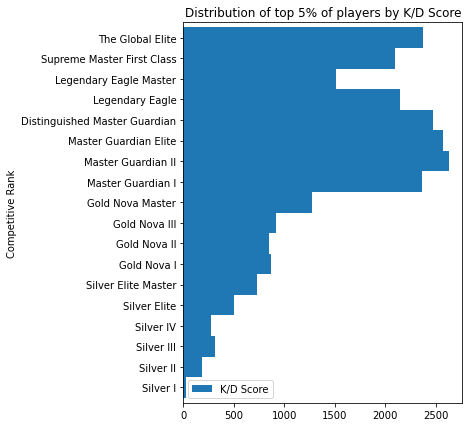

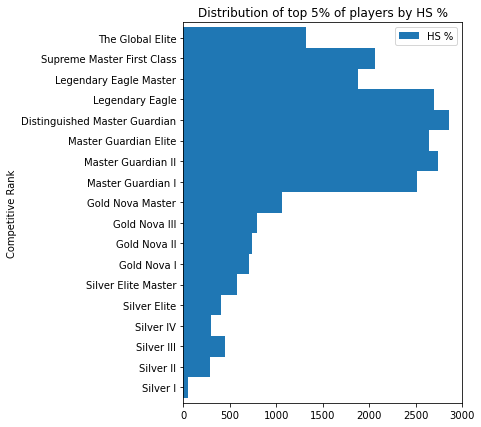

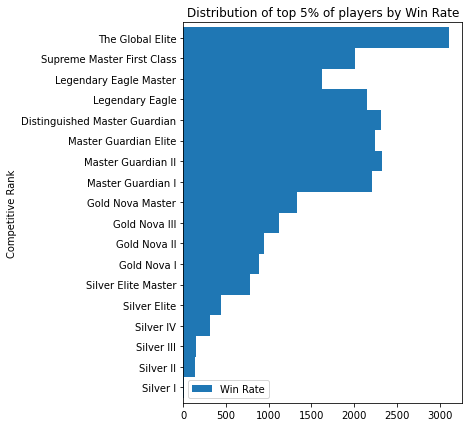

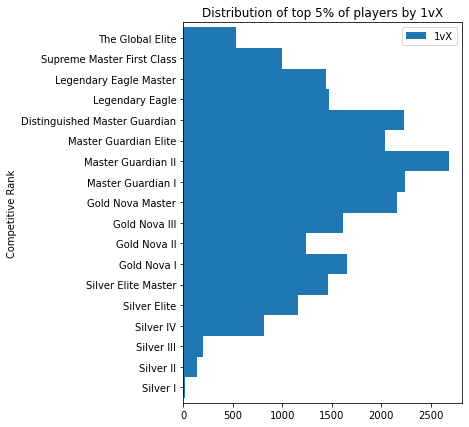

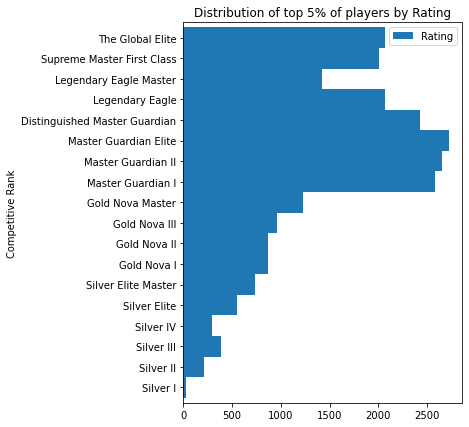

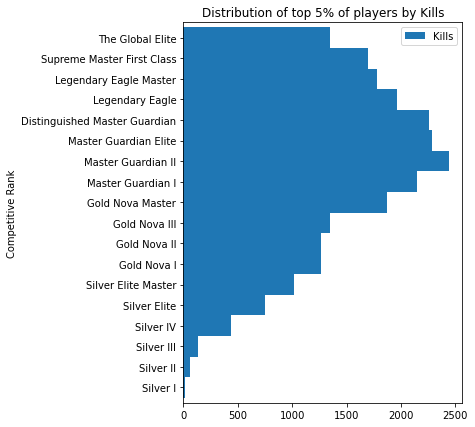

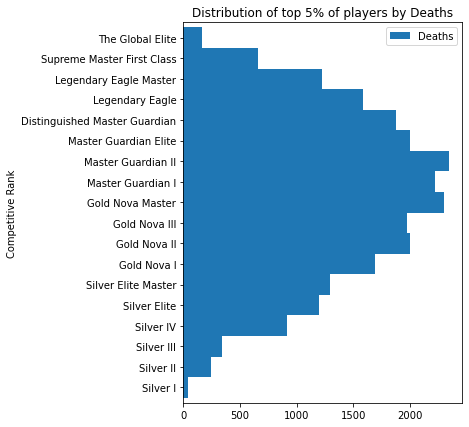

In [23]:
axs = []

for i, cur_df in enumerate(best_per_col):
    axs.append(
        cur_df.plot.barh(title='Distribution of top 5% of players by ' + cols[i],
                     figsize=(5, 7), width=1)
    )

We can see in the distribution graphs that the top players (per category, in terms of z-score) tend to be in the higher competitive ranks. `K/D Score`, `HS %`, `Win Rate`, `Rating`, and `Kills` were more skewed in the direction of the higher ranks, which makes sense since these are the stats that define how "good" a player is. `1vX` and `Deaths` were more normally distributed, but this is also understandable because lower ranks do not need to be as good as the higher ranks in order to win a "1vX" engagement, and player deaths are most commonly caused by round losses, which normally happen across the rank divisons.

Since we know that most top players in terms of player statistics belong to the higher ranks, this leads us to another question:

## How much do player stats predict rankings?
To know this, we will perform a Spearman correlation between the player statistics and their Leaderboards Rank and Competitive Rank—which, in a sense is also an ordinal ranking.

In [24]:
# Get correlation
leaderboard_spearman = df.corr(method='spearman')

# Drop other ordinal rank scale
leaderboard_spearman.drop('Encoded Competitive Rank', inplace=True)

# Visualize
leaderboard_spearman['Leaderboards Rank'].to_frame().style.background_gradient(cmap='RdYlGn')

The resulting spearman correlation for `Leaderboards Rank` is not very strong throughout the different player statistics. This is understandable because the site gave players a leaderboard rank in accordance to the rank division they were in. Since every rank had, for example a "Top 1" player, which had different player statistics across the different ranks, there is more variation in the data, affecting the correlation. It only resulted at most a **Strong** correlation for `K/D Score` and `Rating`. Despite this, it still makes sense as these are the most impactful metrics of a player's skill.

A better reference for a spearman correlation is the player's Competitive Rank, which itself is an ordinal rank—the highest rank (The Global Elite) being number 1.

In [25]:
# Represent competitive groups by their average
comp_df = df.groupby('Competitive Rank').mean()

# Drop other ordinal rank scale
comp_df.drop(columns='Leaderboards Rank', inplace=True)

# Get correlation and visualize
comp_spearman = comp_df.corr(method = "spearman")
comp_spearman['Encoded Competitive Rank'].to_frame().style.background_gradient(cmap='RdYlGn')

The Spearman correlation for the Competitive Rank showed better results in comparison to the correlation with the Leaderboards rank. This is because we took the average stats of the players in each rank before correlating with their competitive rank. Doing so allowed us to perform a correlation on the "best representation" of every competitive rank group. At best, it resulted in a monotonic correlation for `HS %`, and very strong correlations through other statistics such as `K/D Score`, `Win Rate`, and `Rating`.

Additionally notice that both correlations were negative, however this is reasonable as the player's rank and their other statistics (Kills, win rate, etc.) should be inversely related. A higher ordinal rank player (lower numerical value) would theoretically be scoring more kills and wins than that of a lower ordinal rank player (higher numerical value).

# Conclusion
In summary, we found that the average stats of players through different competitive rank divisions tended to go higher as their competitive rank increased. Additionally, most of the better performing players comprised the higher ranking players as well. Additional tests showed that there was a very strong correlation between a player's competitive rank and their statistics.

We can conclude that with this a player's rank matters; however it is only for predicting their likely rank. There is a very strong correlation between a player's statistics and their rank, however it does not necessarily cause or imply them to be a high ranked player. We can infer that a higher ranked player is likely to have higher statistics, but not the reverse. A player having higher statistics in their group only likely means that they belong in a higher competitive group.